# Week 4 Notebook 4 Colours (with Exercise Solutions)


Let's have a look at how we can choose colours for our plots.

In this notebook, we will cover:
- Using the color argument
- Different colormaps
- Seaborn Palettes

Let's start by importing the libraries and reading in the WIDS datathon data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
wids_train = pd.read_csv('wids-climate-train.csv')

In [2]:
wids_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## Matplotlib colours

A good tutorial on colours is available in [Plotting with Pride: Colors in Matplotlib](https://petercbsmith.github.io/color-tutorial.html). Here we will try to view some of the colours available.

You might have noticed we added another import above: `import matplotlib.colors as mcolors`. This gives us the `colors` module which allows us to find the names of each of the colours available.

Without using specific named colours, Matplotlib will give us default colours. We can show them in the legend below.

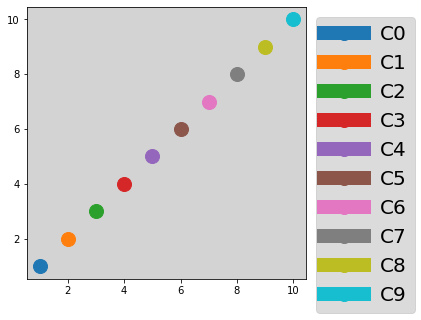

In [3]:
# Show the default colours
val = 1
fig, ax= plt.subplots(figsize=(5,5))
ax.set_facecolor("lightgray")
for color in range(10):
    choice =("C"+str(color)) 
    plt.plot(val, val, c=choice, label=choice, linewidth=14, marker='o', markersize=14)
    val= val+1
    
# plot the legend to show the colors, use bbox_to_anchor to put the legend outside the bounding boxes of the axes
plt.legend(fontsize=20, bbox_to_anchor=(1,1), facecolor="lightgray") 
plt.show()

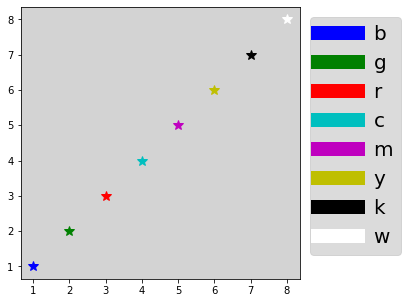

In [4]:
# Print the colours in a legend
val = 1
fig, ax= plt.subplots(figsize=(5,5))
ax.set_facecolor("lightgray")

# look through the colours defined in mcolors.BASE_COLORS
# You can try other colours eg mcolors.TABLEAU_COLORS, mcolors.CSS4_COLORS, mcolors.XKCD_COLORS
for color in mcolors.BASE_COLORS:   
    plt.plot(val, val, c=color, label=color, linewidth=14, marker='*', markersize=10)
    val= val+1
    
# plot the legend to show the colors, use bbox_to_anchor to put the legend outside the bounding boxes of the axes
plt.legend(fontsize=20, bbox_to_anchor=(1,1), facecolor="lightgray") 
plt.show()

## Plotting the WIDS data

Let's see how we can use the colours to define our data. 

Using basic Matplotlib plotting, we use the `color=` or `c=` argument to define the colour for plot elements.


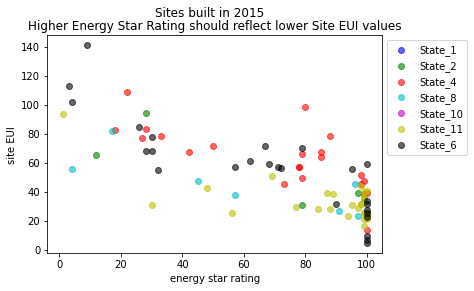

In [5]:
# Select only sites built in 2015, for example
data = wids_train[wids_train['year_built']==2015]

# Define a dictionary so that each state is given a specific colour
colors_by_state ={'State_1':'b','State_2':'g' ,'State_4':'r', 'State_8':'c', 'State_10': 'm', 'State_11':'y', 'State_6':'k' }

# Create the plot
fig, ax= plt.subplots()

# plot the points for each state
for state_name in colors_by_state:
    state_data = data[data['State_Factor']==state_name]  # get the data for one state
    ax.scatter(state_data['energy_star_rating'], state_data['site_eui'], 
               color=colors_by_state[state_name], label=state_name, alpha=0.6)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('energy star rating')
ax.set_ylabel('site EUI')
ax.set_title('Higher Energy Star Rating should reflect lower Site EUI values')
fig.suptitle('Sites built in 2015')
plt.show()

## Case Study - Checking Energy Star Rating Awarded by States

We want to be able to compare the energy star ratings awarded vs the site EUI values for each state. Maybe this can tell us which states are able to award the energy star ratings accurately.

Let's try to check which facility types in which states have the highest site EUI ratings vs energy star ratings. 
First we have to group and find the mean site EUI and mean energy star rating for each state.

You might recall that there are some missing values for the energy star ratings. As we want to find out which buildings have more accurate energy star ratings, those with missing values will not help in our analysis.

In [6]:
# drop data where energy star rating value is null
star_rated = wids_train.dropna(subset=['energy_star_rating'])


**Group By State, Building and Facility Type**

Now we can calculate the mean values for site EUI and energy star rating for each state, building class and facility type.
We will reset the index on the data frame so that we can get a new data frame to be used in the plot. 

Don't forget we want to use the `star_rated` data set.

In [7]:
# Calculate mean values for each group of state, building class and facility type that have been awarded energy star ratings
mean_by_state_bldg = star_rated.groupby(['State_Factor','building_class','facility_type']).mean()
mean_by_state_bldg.reset_index(inplace=True)
mean_by_state_bldg


,State_Factor,building_class,facility_type,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,State_1,Commercial,Commercial_Other,3.090909,61817.363636,1965.363636,39.454545,10.827273,30.090909,49.956012,...,75.545455,20.636364,1.272727,0.0,1.000000,1.000000,1.000000,72.800000,321.164019,1848.909091
1,State_1,Commercial,Commercial_Unknown,4.500000,829730.000000,1937.000000,96.750000,49.050000,32.250000,50.991935,...,62.750000,17.500000,2.500000,0.0,NaN,NaN,NaN,NaN,44.401370,3219.000000
2,State_1,Commercial,Data_Center,3.500000,616793.000000,1955.000000,15.166667,2.400000,31.833333,50.416667,...,72.000000,21.166667,2.666667,0.0,1.000000,1.000000,1.000000,88.000000,655.460685,2163.000000
3,State_1,Commercial,Education_College_or_university,3.400000,109238.500000,1969.500000,85.200000,25.880000,32.000000,50.519355,...,62.700000,17.300000,2.100000,0.0,1.000000,1.000000,1.000000,88.000000,65.325851,2594.600000
4,State_1,Commercial,Education_Other_classroom,3.958333,56884.729167,1934.186047,74.937500,38.645833,32.250000,50.744960,...,66.979167,19.187500,2.479167,0.0,40.857143,55.833333,3.285714,85.285714,32.968340,2807.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,State_8,Commercial,Warehouse_Distribution_or_Shipping_center,4.405941,182401.594059,1959.326733,67.603960,53.946535,3.772277,28.421056,...,92.801980,14.158416,0.000000,0.0,181.782609,188.304348,10.243478,63.320000,38.472782,67384.851485
137,State_8,Commercial,Warehouse_Nonrefrigerated,4.474886,133077.680365,1964.835616,74.456621,52.084018,4.269406,28.827467,...,93.146119,14.794521,0.000000,0.0,164.459016,171.672131,9.634426,75.696429,23.151888,67428.091324
138,State_8,Commercial,Warehouse_Refrigerated,4.641026,148213.584615,1964.846154,50.051282,44.061538,4.461538,29.003194,...,95.487179,16.205128,0.000000,0.0,127.909091,131.545455,7.290909,88.526316,82.949851,67349.923077
139,State_8,Residential,Mixed_Use_Commercial_and_Residential,4.500000,207742.750000,1936.500000,81.000000,79.625000,4.500000,29.001251,...,93.750000,15.750000,0.000000,0.0,NaN,NaN,NaN,NaN,56.985681,67676.250000


Using this data, we can create a scatter plot of the mean site EUI vs the Energy Star Rating and find the top Facility Types.

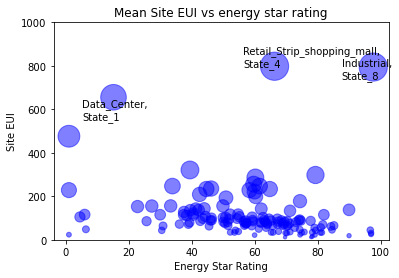

In [8]:
# Scatter plot where size of marker indicates higher site EUI
fig, ax= plt.subplots()
ax.scatter(mean_by_state_bldg['energy_star_rating'], mean_by_state_bldg['site_eui'], c='blue',
           alpha=0.5, s=mean_by_state_bldg['site_eui'])

ax.set_xlabel('Energy Star Rating')
ax.set_ylabel('Site EUI')
ax.set_ylim(0,1000)
ax.set_title('Mean Site EUI vs energy star rating')

# find facility type and state with three highest max site eui

# First sort the values by site EUI
top3 = mean_by_state_bldg.sort_values(by='site_eui', ascending=False)

# Then put the text for the top 3 only - can change to 5, or 10
for i in range(3):
    top = top3.iloc[i]
    xVal= top['energy_star_rating']
    
    # add annotation to the top 3 only
    ax.annotate(top['facility_type']+',\n'+top['State_Factor'], xy=(xVal,top['site_eui']), xytext=(xVal-10,top['site_eui']-(i*50) ))

plt.show()

## Using Colours to represent Values

In the plot above we have used the size of the markers to indicate the site EUI value - bigger markers show that the site EUI is higher. We can also use colours to show the value of another dimension.

For example, if we want to use the colour based on the energy star rating:


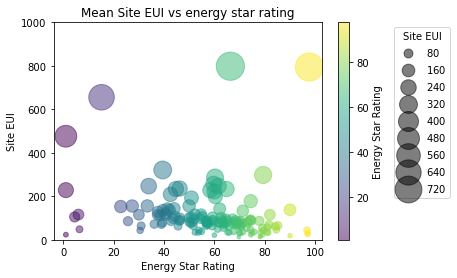

In [9]:
# Scatter plot where size of marker indicates higher site EUI and colour indicates the energy star rating
fig, ax= plt.subplots()
sc = ax.scatter(mean_by_state_bldg['energy_star_rating'], mean_by_state_bldg['site_eui'],
           alpha=0.5, s=mean_by_state_bldg['site_eui'], c=mean_by_state_bldg['energy_star_rating'])

ax.set_xlabel('Energy Star Rating')
ax.set_ylabel('Site EUI')
ax.set_ylim(0,1000)
ax.set_title('Mean Site EUI vs energy star rating')

# add the color bar to indicate the color values
plt.colorbar(sc, label='Energy Star Rating')

# get the sizes for the legend
handles, labels = sc.legend_elements(prop='sizes')
ax.legend(handles, labels, bbox_to_anchor=(1.5,1), title='Site EUI')

plt.show()

## Colormaps

The `colorbar` that has been added shows the colours that the values of energy star rating map to. This is known as the ***colormap***. You have a large choice as you can see in the [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) reference.

The default colormap used in the plot above is `viridis`. However it does not represent energy star values well. 

We can specify a better colormap, for example if we want to indicate that green is best and red is worst, we can use the `RdYlGn` colormap:



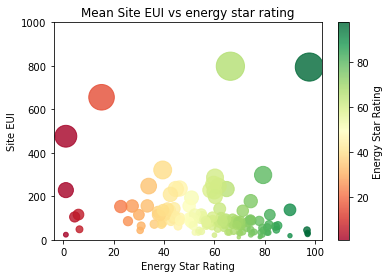

In [10]:
# Scatter plot where size of marker indicates higher site EUI and colour indicates the energy star rating
fig, ax= plt.subplots()
sc = ax.scatter(mean_by_state_bldg['energy_star_rating'], mean_by_state_bldg['site_eui'],
           alpha=0.8, s=mean_by_state_bldg['site_eui'], c=mean_by_state_bldg['energy_star_rating'], cmap='RdYlGn')

ax.set_xlabel('Energy Star Rating')
ax.set_ylabel('Site EUI')
ax.set_ylim(0,1000)
ax.set_title('Mean Site EUI vs energy star rating')

# add the colorbar to indicate the color values
plt.colorbar(sc, label='Energy Star Rating')
plt.show()

### Reversing Colormaps

To reverse the sequence of the colour values in a colormap, you can just add `_r` to the name of the colormap. For example in the plot below, instead of the `summer` colormap where lower values are green and higher values are yellow, the value of the colormap has been set to `cmap='summer_r`.

Text(0.5, 1.0, 'Mean Site EUI for facility types in each state')

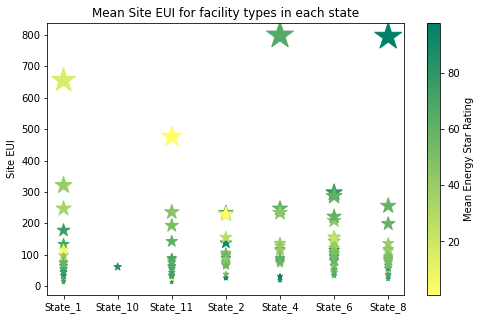

In [11]:
fig, ax= plt.subplots(figsize=(8,5))

# choose the summer colormap but reverse it in the cmap argument
scatter=ax.scatter(mean_by_state_bldg['State_Factor'], 
               mean_by_state_bldg['site_eui'],
               c=mean_by_state_bldg['energy_star_rating'], 
               cmap='summer_r', marker='*', s=mean_by_state_bldg['site_eui'])
plt.colorbar(scatter, label = 'Mean Energy Star Rating')

ax.set_ylabel('Site EUI')

ax.set_title('Mean Site EUI for facility types in each state')

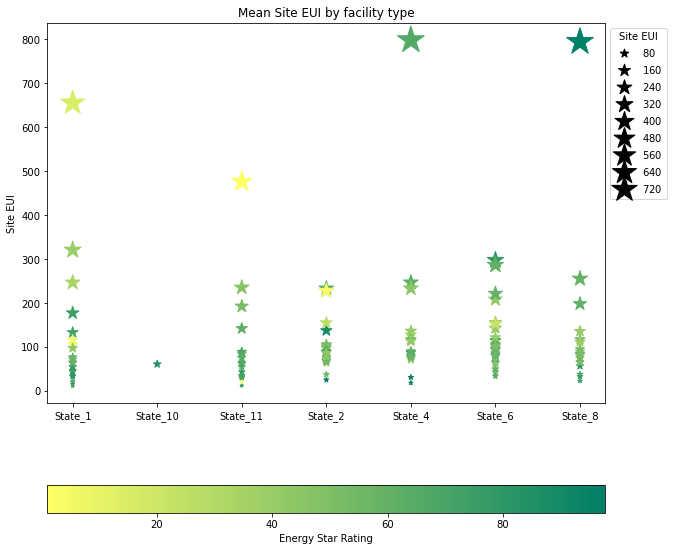

In [12]:
fig, ax= plt.subplots(figsize=(10,10))

# choose the summer colormap but reverse it in the cmap argument
scatter=ax.scatter(mean_by_state_bldg['State_Factor'], 
               mean_by_state_bldg['site_eui'],
               c=mean_by_state_bldg['energy_star_rating'], 
               cmap='summer_r', marker='*', s=mean_by_state_bldg['site_eui'])
ax.set_ylabel('Site EUI')
ax.set_title('Mean Site EUI by facility type')

# set the colorbar at the bottom instead
plt.colorbar(scatter, location='bottom', ticks=None, label='Energy Star Rating')


# Then the legend on the right
handles, labels = scatter.legend_elements(prop='sizes')
plt.legend(handles, labels, bbox_to_anchor=(1,1), title='Site EUI')

## Seaborn Palette

In the previous notebooks we have used the Seaborn `hue` argument to distinguish categories. However, we can also specify the choice of colours that the hue should use. This uses the `palette` argument.


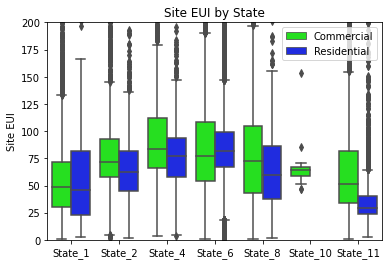

In [13]:
# specifying the palette to use
fig, ax = plt.subplots()
ax = sns.boxplot(data = wids_train, 
                 x='State_Factor', 
                 y='site_eui', 
                 hue='building_class', 
                 palette = 'hsv')

ax.set_ylim(0,200)
ax.set_xlabel('')
ax.set_ylabel('Site EUI')
ax.legend(loc='upper right')
ax.set_title('Site EUI by State')
plt.show()

The tutorial on [Choosing Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) provides some examples of the names of palettes. Seaborn is still compatible with the Matplotlib colormaps, so you can choose from the the colormaps names or the palette names.

Let's try out more plots in the exercises!


# Exercises

Let's try to customise the plots for the bike sharing data set with more colours.


In [14]:
date_cols = ['rental_date','started_at', 'ended_at']
bikes = pd.read_csv('bikes_clean.csv', parse_dates = date_cols, dayfirst=True)
bikes.head()

,ride_id,rideable_type,rental_date,rental_hour,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_in_min,day_of_week
0,5A2157D0EC77FF72,classic,2022-01-01,0,2022-01-01 00:04:00,2022-01-01 00:10:00,31241.0,38.905900,-77.032500,38.902760,-77.038630,casual,0 days 00:06:00,6,Saturday
1,19DBFDE1D077F113,electric,2022-01-01,0,2022-01-01 00:05:00,2022-01-01 00:15:00,31202.0,38.913055,-77.031823,38.930000,-77.050000,casual,0 days 00:10:00,10,Saturday
2,1B6B8A705833DCE2,docked,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:47:00,31200.0,38.910100,-77.044400,38.900283,-77.029822,casual,0 days 00:41:00,41,Saturday
3,ED112F28D5F492B8,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday
4,6F2C888044490871,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday


In [15]:
# create the bike groups and count the total number of ride_ids in each group
import numpy as np
groups = bikes.groupby(['rideable_type','member_casual','day_of_week','rental_date','rental_hour'])['duration_in_min'].agg([np.mean,len])
daily_rentals =  groups.reset_index()
# find the number of rentals for each group and the mean duration in minutes
daily_rentals.rename(columns={'mean':'mean_duration', 'len':'num_rentals'}, inplace=True)
daily_rentals

,rideable_type,member_casual,day_of_week,rental_date,rental_hour,mean_duration,num_rentals
0,classic,casual,Friday,2022-01-07,0,11.200000,5
1,classic,casual,Friday,2022-01-07,1,7.000000,3
2,classic,casual,Friday,2022-01-07,2,5.000000,3
3,classic,casual,Friday,2022-01-07,3,215.000000,4
4,classic,casual,Friday,2022-01-07,5,12.500000,2
...,...,...,...,...,...,...,...
3339,electric,member,Wednesday,2022-01-26,19,10.925926,27
3340,electric,member,Wednesday,2022-01-26,20,10.480000,25
3341,electric,member,Wednesday,2022-01-26,21,9.578947,38
3342,electric,member,Wednesday,2022-01-26,22,10.480000,25


**Q1. Basic Scatterplot**

Create a basic scatterplot of the hour of day by duration in minutes, to view the mean duration of rental for different hours of the day throughout the whole month, for different types of bikes.
- create the dictionary of colours for each rideable_type
- use a for loop to loop through the dictionary of bike types
- using the `daily_rentals` data set, plot the scatter plot with `rental_hour` on the x-axis, `mean_duration` on the y-axis, and the color for the points based on the bike type.
- try to add the size of the points based on the `mean_duration`. 



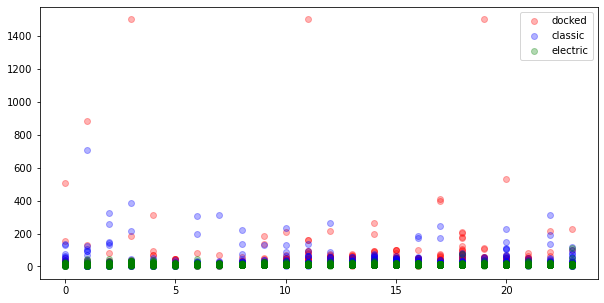

In [16]:
# Set colors for the types of bikes - choose suitable colors
bike_colors = {'docked':'red', 'classic':'blue','electric':'green'}

# Create a basic Matplotlib scatter plot
fig, ax = plt.subplots(figsize=(10,5))

# plot the points for each bike type
for bike in bike_colors:
    bike_data = daily_rentals[daily_rentals['rideable_type']==bike]
    ax.scatter(data = bike_data, x = 'rental_hour',y='mean_duration', color=bike_colors[bike], label=bike, alpha=0.3)  # alpha to set transparency

plt.legend()
plt.show()

You should be able to see from the plot that electric bikes are taken at all hours but only for shorter durations.

**Q2. Scatter Plot**

Create a scatter plot to see the number of rentals over the whole month, with the colour based on the rental hour. 
- Use the `daily_rentals` data set
- use the `rental_date` on the x-axis
- use the `num_rentals` on the y-axis, to show the number of rentals for the different bikes and hours
- use the argument `c=rental_hour` to specify that it should be a sequence of values to be mapped
- use a suitable colormap for the rental hour with the `cmap=` argument.
- add a colorbar

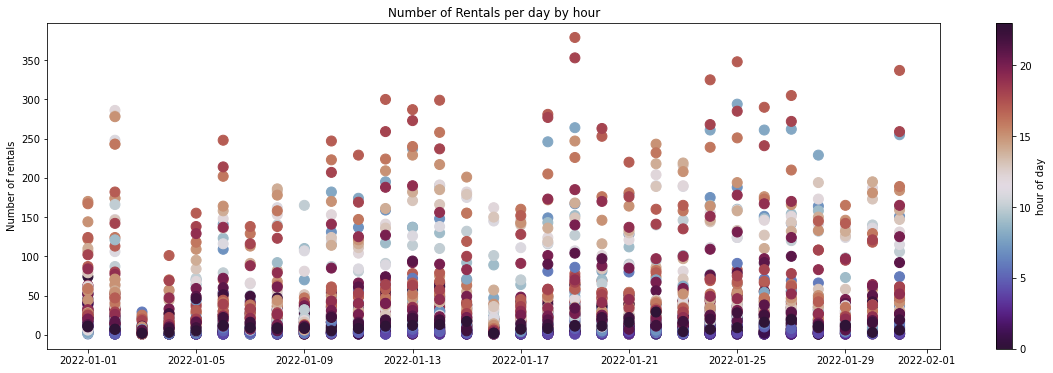

In [17]:
# Q2. Scatterplot to show the number of rentals by rental date for different hours of the day
fig, ax = plt.subplots(figsize=(20,6))
sc=ax.scatter(data=daily_rentals, x = 'rental_date', y='num_rentals', c='rental_hour', cmap='twilight_shifted', s=100)
plt.colorbar(sc, label='hour of day')
ax.set_title('Number of Rentals per day by hour')
ax.set_ylabel('Number of rentals')
plt.show()

## Using Seaborn 

**Q3. Seaborn Lineplot**

Create a lineplot using Seaborn on the `daily_rentals` data set to show the rental date on the x-axis, the mean duration on the y-axis, and the `hue` argument to show two lines of different colours, each representing whether the rentals are from members or casual users.
Select a suitable value for the `palette` argument for the colours.

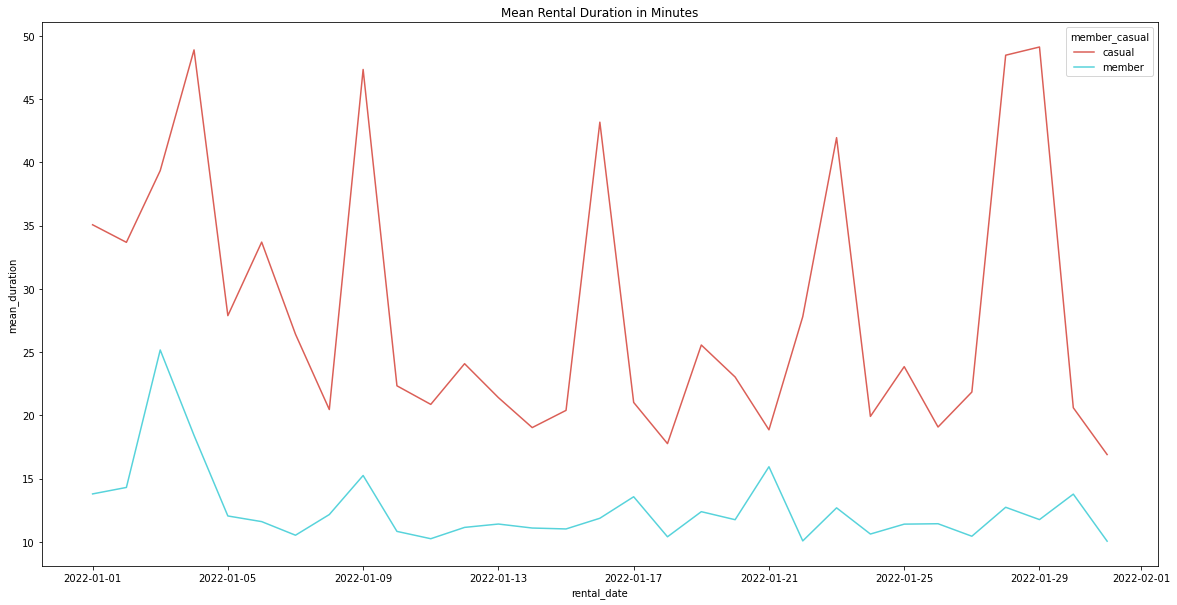

In [18]:
# plot duration of rental by date
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(ax = ax, data=daily_rentals, x='rental_date', y='mean_duration', hue='member_casual', palette = 'hls', ci=None)
ax.set_title('Mean Rental Duration in Minutes')
plt.show()

## Seaborn Heatmap

Let's practice creating the heatmap and selecting suitable colours. To create a heatmap, we have to create a two-way table of data first.

**Q4a. Two-Way Table**

Create a two-way table using the `groupby()` method on the `daily_rentals` data set to find the ***sum*** of `num_rentals` for the `rental_date` by the `rental_hour`.


In [19]:
hourly_Rentals = daily_rentals.groupby(['rental_date', 'rental_hour'])['num_rentals'].sum()
data = hourly_Rentals.unstack()
data

rental_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
rental_date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,188.0,201.0,156.0,50.0,31.0,30.0,33.0,17.0,27.0,30.0,...,306.0,440.0,406.0,291.0,246.0,218.0,138.0,100.0,60.0,87.0
2022-01-02,63.0,22.0,18.0,9.0,8.0,14.0,18.0,50.0,93.0,201.0,...,590.0,641.0,510.0,416.0,300.0,181.0,116.0,113.0,79.0,37.0
2022-01-03,18.0,10.0,8.0,4.0,7.0,16.0,44.0,30.0,25.0,22.0,...,17.0,39.0,41.0,34.0,32.0,18.0,17.0,27.0,12.0,11.0
2022-01-04,8.0,4.0,NaN,4.0,5.0,6.0,22.0,27.0,37.0,46.0,...,92.0,100.0,118.0,157.0,129.0,80.0,52.0,26.0,48.0,24.0
2022-01-05,11.0,4.0,2.0,4.0,8.0,21.0,38.0,63.0,97.0,101.0,...,155.0,180.0,187.0,240.0,203.0,184.0,111.0,96.0,78.0,47.0
2022-01-06,20.0,10.0,9.0,5.0,10.0,21.0,81.0,153.0,210.0,178.0,...,271.0,298.0,329.0,398.0,338.0,205.0,140.0,98.0,102.0,51.0
2022-01-07,34.0,13.0,7.0,11.0,4.0,16.0,36.0,50.0,76.0,63.0,...,156.0,187.0,221.0,228.0,206.0,153.0,75.0,74.0,82.0,50.0
2022-01-08,52.0,20.0,23.0,33.0,9.0,9.0,28.0,38.0,61.0,149.0,...,338.0,341.0,294.0,235.0,211.0,147.0,93.0,58.0,82.0,65.0
2022-01-09,55.0,44.0,28.0,20.0,16.0,14.0,26.0,46.0,106.0,146.0,...,55.0,60.0,78.0,57.0,71.0,57.0,61.0,71.0,60.0,39.0


**Q4b. Heatmap**

Using the data in Q4a, create a heatmap that shows the rental date vs the rental hour and select a suitable colormap to represent the number of rentals. Don't forget to use `annot=True` so that you can check the values against the colour.

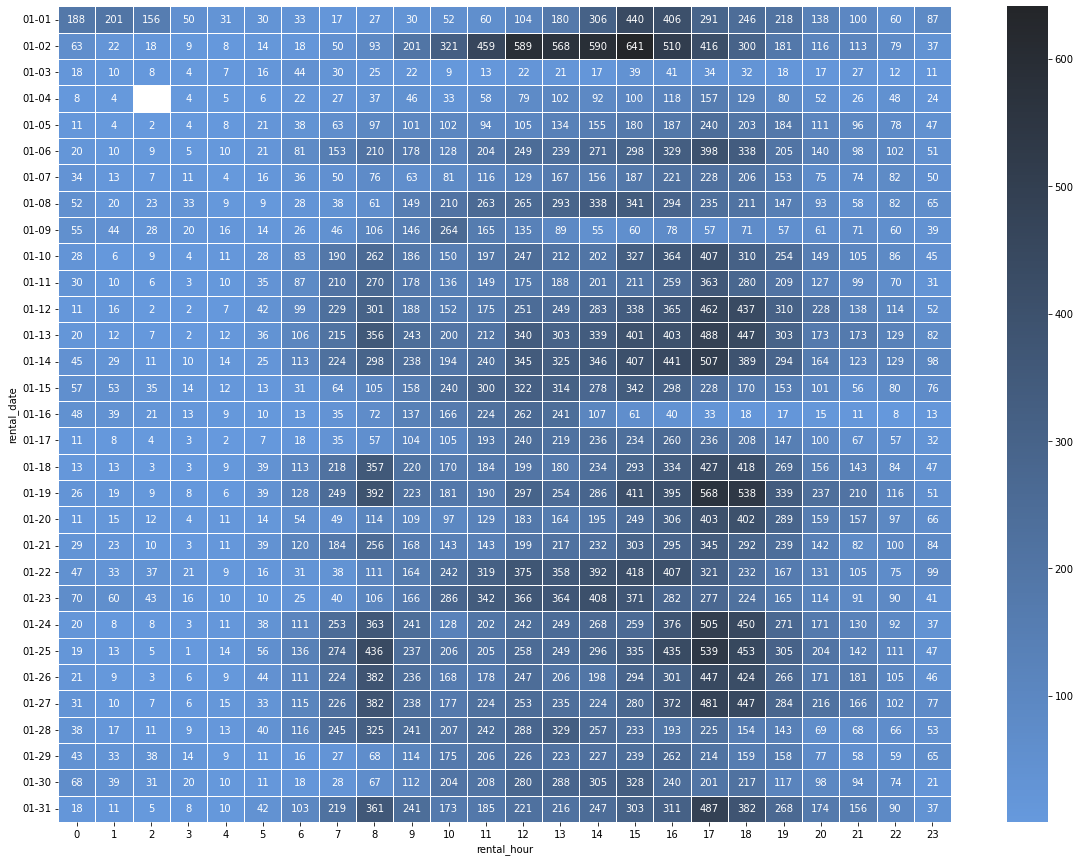

In [20]:
# to set up date formatting
import matplotlib.dates as mdates

# Create heatmap using 
# two way table data
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.heatmap(data, linewidths=0.5, annot=True,  fmt=".0f", cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))

# Just show the month and day

ax.yaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


plt.show()